# Naive Bayes for Iris Classification

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [37]:
df = pd.read_csv("Iris.csv")

## 1) Phân tích dữ liệu

In [38]:
df.shape

(150, 6)

In [39]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [42]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [43]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [44]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Visualization

Text(0, 0.5, '')

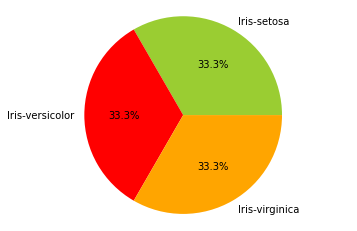

In [45]:
# Vẽ để xem tỉ lệ các hoa
fig, ax = plt.subplots(1, 1)
ax.pie(df.Species.value_counts(),autopct='%1.1f%%', labels=['Iris-setosa','Iris-versicolor','Iris-virginica'], colors=['yellowgreen','r','orange'])
plt.axis('equal')
plt.ylabel('')

In [46]:
df = df.drop(['Id'],axis=1)

In [47]:
df["Species"]=df["Species"].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Nhìn chung dữ liệu không lệch nhiều so với dữ liệu tổng thể nên không cần chuẩn hóa

In [48]:
#separate data
drop_list = []
df = df.drop(drop_list,axis=1)
print(df.columns)
#test train split time
from sklearn.model_selection import train_test_split
y = df['Species'].values #target
X = df.drop(['Species'],axis=1).values #features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                            random_state=42, stratify=y)
print("train-set size: ", len(y_train), "\ntest-set size: ", len(y_test))


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
train-set size:  120 
test-set size:  30


## 3) Xây dựng mô hình phân lớp GaussianNB

In [49]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
# fit it to training data
clf.fit(X_train,y_train)
clf

GaussianNB()

In [50]:
# predict using test data
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0], dtype=int64)

In [51]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob

array([[1.00000000e+000, 2.08454349e-020, 1.22885792e-025],
       [8.27421249e-142, 8.77457912e-002, 9.12254209e-001],
       [4.64821023e-036, 9.99999490e-001, 5.10180517e-007],
       [2.43658908e-036, 9.99999567e-001, 4.32500853e-007],
       [1.00000000e+000, 6.67564970e-021, 6.86289815e-026],
       [1.30312374e-121, 6.48278636e-001, 3.51721364e-001],
       [1.00000000e+000, 2.07051456e-022, 1.29459118e-026],
       [1.00000000e+000, 3.23692231e-017, 1.27782258e-022],
       [7.16873160e-174, 1.47628468e-004, 9.99852372e-001],
       [6.88104604e-104, 9.93265431e-001, 6.73456902e-003],
       [3.53182095e-251, 1.37398727e-007, 9.99999863e-001],
       [1.23332555e-188, 6.00049312e-008, 9.99999940e-001],
       [1.73388134e-227, 3.12244544e-008, 9.99999969e-001],
       [9.38369997e-108, 9.53502494e-001, 4.64975058e-002],
       [1.00000000e+000, 8.25826380e-020, 4.83983421e-025],
       [1.00000000e+000, 4.24566083e-020, 2.13114594e-025],
       [1.00000000e+000, 6.83540167e-021

In [52]:
train_pred = clf.predict(X_train)
train_pred

array([0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 2, 0], dtype=int64)

## 4) Evaluation

#### Tập train

In [53]:
print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 

train-set confusion matrix:
 [[40  0  0]
 [ 0 38  2]
 [ 0  3 37]]


#### Tập test

In [54]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred,average='macro'))


test-set confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
recall score:  0.9666666666666667


In [55]:
print("precision score: ", precision_score(y_test,y_pred,average='macro'))
print("f1 score: ", f1_score(y_test,y_pred,average='macro'))


precision score:  0.9696969696969697
f1 score:  0.9665831244778613


In [56]:
print("accuracy score: ", accuracy_score(y_test,y_pred))

accuracy score:  0.9666666666666667
